# 1.import  Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


# 2. Load Dataset


In [2]:
data=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 3. Exploratory Data Analysis (EDA)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
952,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
587,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
512,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
305,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
856,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
400,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
601,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
824,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
569,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.shape

(1025, 14)

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

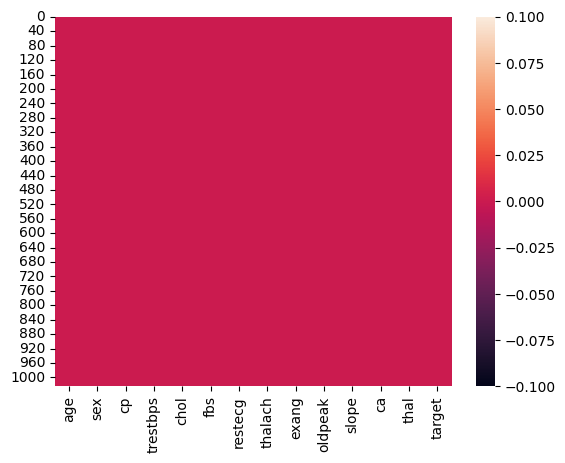

In [11]:
sns.heatmap(data.isnull())

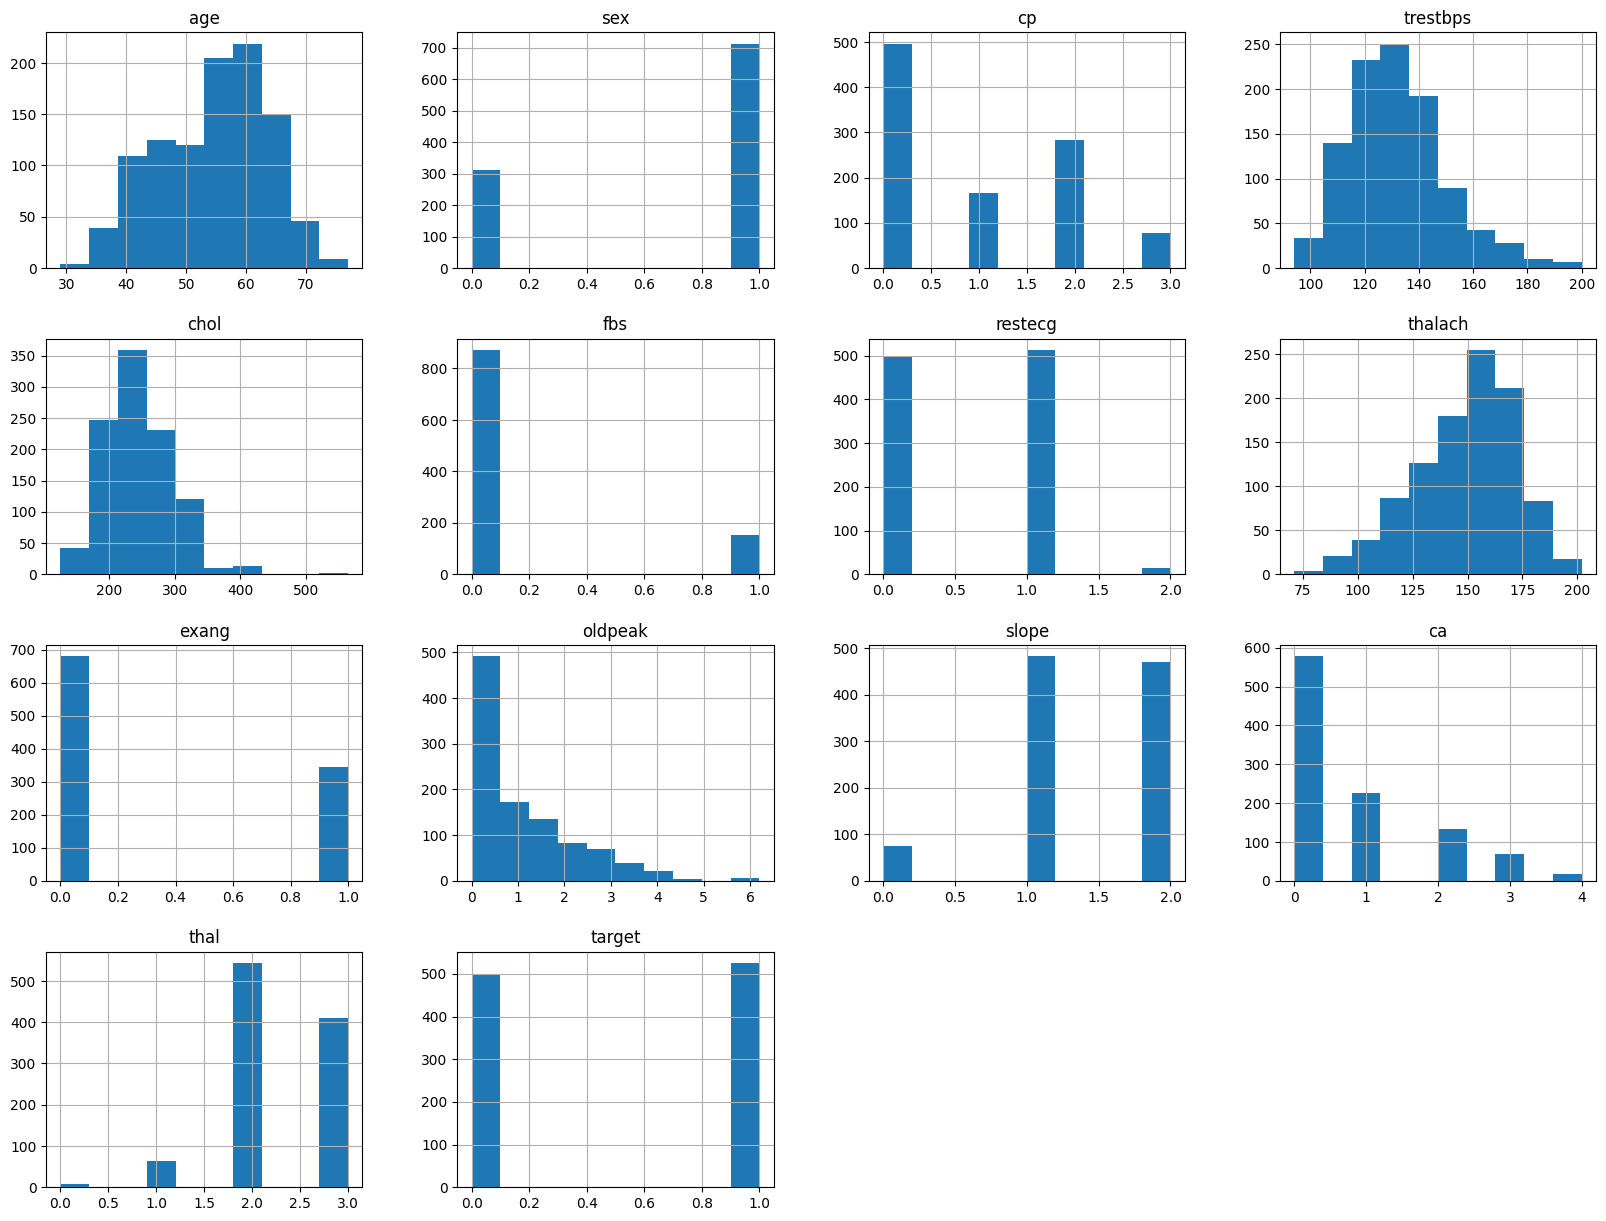

In [12]:
data.hist(figsize=(20,15))
plt.show()

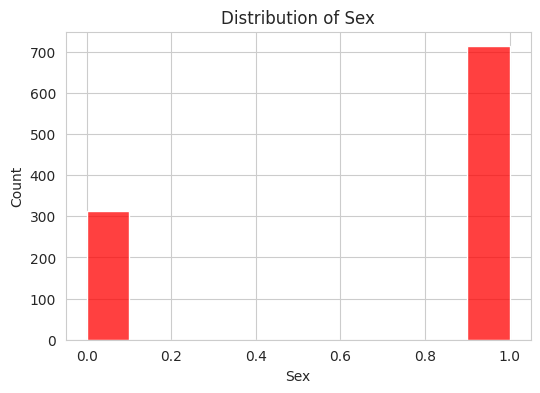

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(6,4))
sns.histplot(data['sex'], color='red', bins=10)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


<Axes: ylabel='count'>

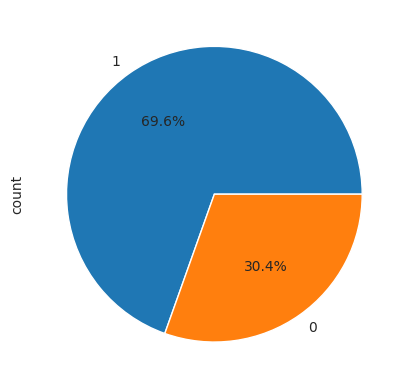

In [14]:
data.sex.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='cp', ylabel='Count'>

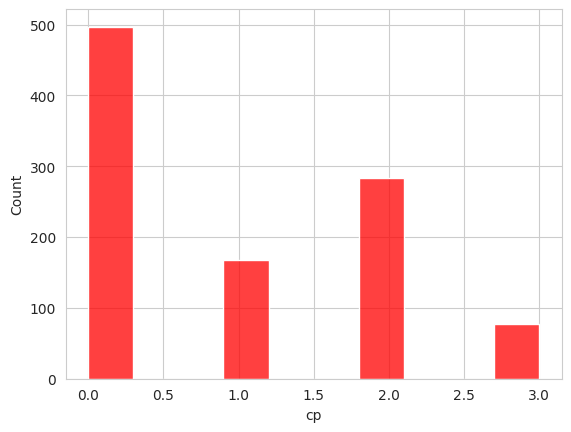

In [15]:
sns.set_style('whitegrid')
sns.histplot(data['cp'],color ='red', bins = 10)

<Axes: xlabel='sex', ylabel='count'>

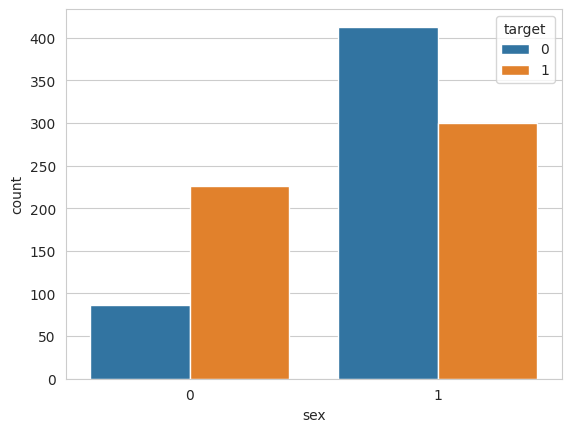

In [16]:
sns.countplot(data=data, x='sex', hue='target')

<Axes: ylabel='count'>

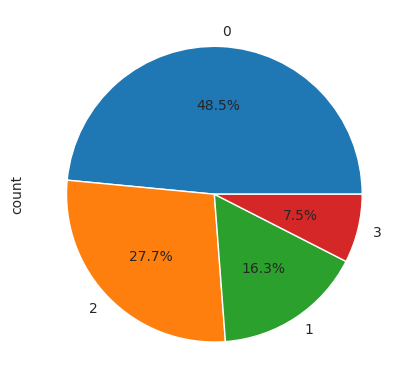

In [17]:
data.cp.value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='target', ylabel='Count'>

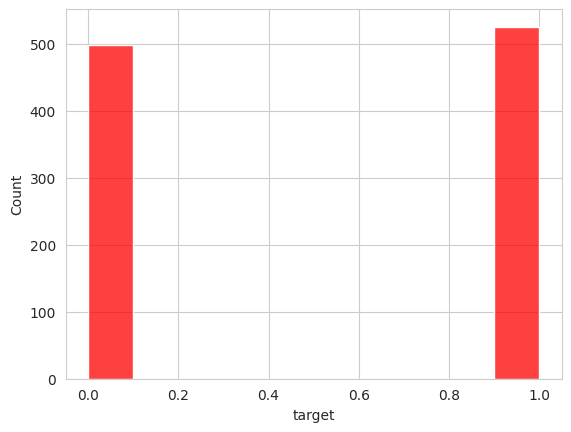

In [18]:
sns.set_style('whitegrid')
sns.histplot(data['target'],color ='red', bins = 10)

<Axes: ylabel='count'>

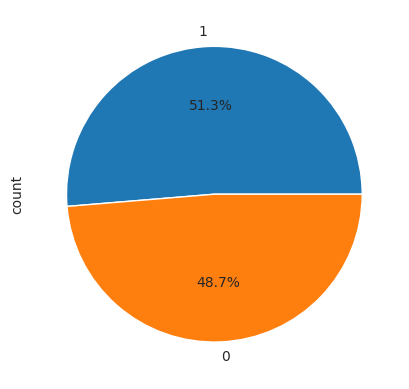

In [19]:
data.target.value_counts().plot.pie(autopct='%1.1f%%')

# 4. Correlation Matrix


In [20]:
cor=data.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

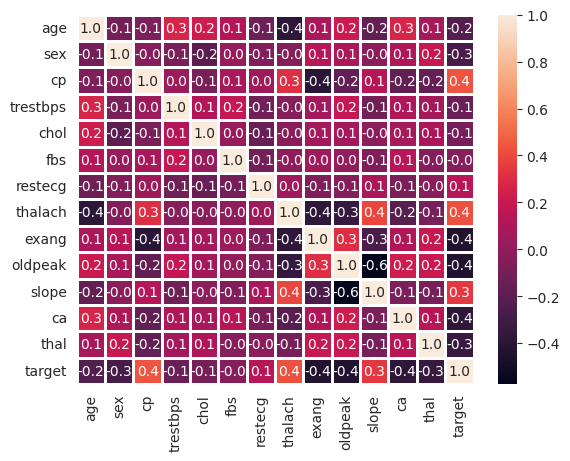

In [21]:
sns.heatmap(cor,annot=True,fmt='.1f',linewidths=2)

# 5. Feature Selection


In [22]:
x=data.drop(columns='target',axis=1)
y=data['target']

# 6. Train/Test Split


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# 7. Model Training and Evaluation

In [24]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

algorithms = []
accuracies = []
recalls = []
f1_scores = []

def all(model, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall_val = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)

    print(f"{name} - Accuracy: {accuracy}, Recall: {recall_val}, F1 Score: {f1_val}")

    algorithms.append(name)
    accuracies.append(accuracy)
    recalls.append(recall_val)
    f1_scores.append(f1_val)


In [25]:
all(LogisticRegression(), 'Logistic Regression')
all(RandomForestClassifier(), 'Random Forest')
all(GradientBoostingClassifier(), 'Gradient Boosting')
all(SVC(), 'SVC')
all(KNeighborsClassifier(), 'KNN')
all(DecisionTreeClassifier(), 'Decision Tree')


Logistic Regression - Accuracy: 0.7853658536585366, Recall: 0.8737864077669902, F1 Score: 0.8035714285714285
Random Forest - Accuracy: 0.9853658536585366, Recall: 0.970873786407767, F1 Score: 0.9852216748768473
Gradient Boosting - Accuracy: 0.9317073170731708, Recall: 0.9514563106796117, F1 Score: 0.9333333333333335
SVC - Accuracy: 0.6829268292682927, Recall: 0.7572815533980582, F1 Score: 0.7058823529411764
KNN - Accuracy: 0.7317073170731707, Recall: 0.7378640776699029, F1 Score: 0.7342995169082126
Decision Tree - Accuracy: 0.9853658536585366, Recall: 0.970873786407767, F1 Score: 0.9852216748768473


In [26]:
FINAL_RESULT = pd.DataFrame({
    'ALGORITHM': algorithms,
    'ACCURACY': accuracies,
    'RECALL': recalls,
    'F1_SCORE': f1_scores
})

print(FINAL_RESULT.sort_values(by='ACCURACY', ascending=False))


             ALGORITHM  ACCURACY    RECALL  F1_SCORE
1        Random Forest  0.985366  0.970874  0.985222
5        Decision Tree  0.985366  0.970874  0.985222
2    Gradient Boosting  0.931707  0.951456  0.933333
0  Logistic Regression  0.785366  0.873786  0.803571
4                  KNN  0.731707  0.737864  0.734300
3                  SVC  0.682927  0.757282  0.705882


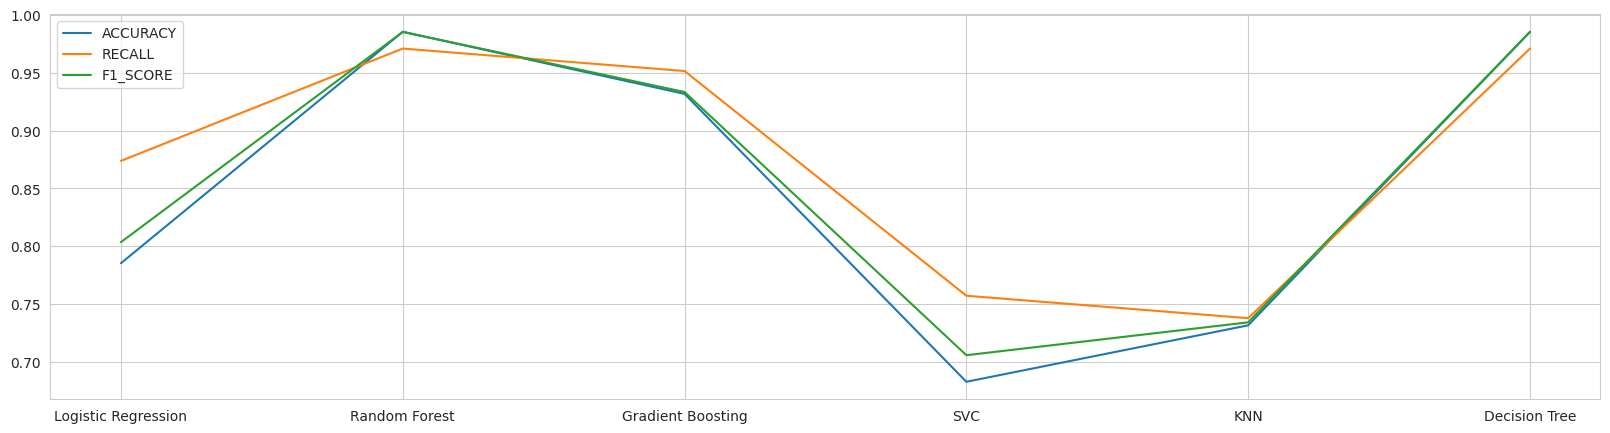

In [27]:
fig,ax0=plt.subplots(figsize=(20,5))
plt.plot(FINAL_RESULT['ALGORITHM'],FINAL_RESULT['ACCURACY'],label='ACCURACY')
plt.plot(FINAL_RESULT['ALGORITHM'],FINAL_RESULT['RECALL'],label='RECALL')
plt.plot(FINAL_RESULT['ALGORITHM'],FINAL_RESULT['F1_SCORE'],label='F1_SCORE')
plt.legend()
plt.show()